<a href="https://colab.research.google.com/github/71556420/pad_final_Luis_de_la_ossa/blob/main/src/pad20251/proyecto_integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset cargado con éxito.
Vista previa del dataset:
                           movie_title  mcu_phase release_date  tomato_meter  \
0                             Iron Man          1     5/2/2008            94   
1                  The Incredible Hulk          1    6/13/2008            67   
2                           Iron Man 2          1     5/7/2010            72   
3                                 Thor          1     5/6/2011            77   
4   Captain America: The First Avenger          1    7/22/2011            79   
5                         The Avengers          1     5/4/2012            91   
6                           Iron Man 3          2     5/3/2013            79   
7                 Thor: The Dark World          2    11/8/2013            66   
8  Captain America: The Winter Soldier          2     4/4/2014            90   
9              Guardians of the Galaxy          2     8/1/2014            92   

   audience_score  movie_duration production_budget opening_weeken

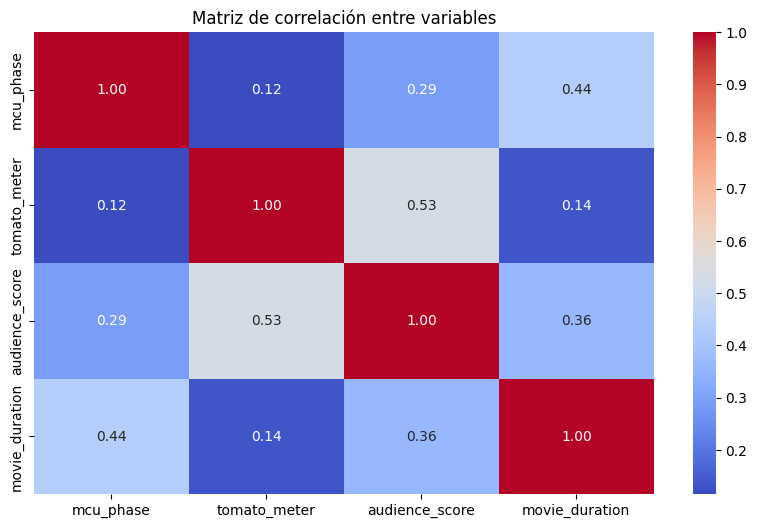

Proceso completado. Dataset limpio exportado como 'MCU_Box_Office_Clean.csv'


In [2]:
# Proyecto Integrador - Análisis del MCU Box Office Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gdown

# URL de descarga directa de Google Drive
file_id = "1jxPMcs9oe2hlxd8GSwXQQqDwWLYIrJZN"
download_url = f"https://drive.google.com/uc?id={file_id}"

dataset_dir = "./mcu_dataset"
dataset_path = os.path.join(dataset_dir, "marvel_cinematic_universe_box_office.csv")

# Crear el directorio si no existe
os.makedirs(dataset_dir, exist_ok=True)

# Descargar el archivo si no existe
if not os.path.exists(dataset_path):
    print("Descargando dataset desde Google Drive...")
    try:
        gdown.download(download_url, dataset_path, quiet=False)
        print("Descarga completa.")
    except Exception as e:
        print(f"ERROR: Ocurrió un problema al descargar el archivo. {e}")

# Cargar dataset
df = None
if os.path.exists(dataset_path):
    try:
        df = pd.read_csv(dataset_path, encoding='utf-8')
        df.columns = df.columns.str.strip()  # Eliminar espacios en nombres de columnas
        print("Dataset cargado con éxito.")
    except Exception as e:
        print(f"ERROR: No se pudo cargar el dataset. {e}")
else:
    print("ERROR: No se encontró el archivo CSV. Verifica la descarga.")

if df is not None:
    ## 2. Exploración de datos
    print("Vista previa del dataset:")
    print(df.head(10))
    print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
    print("\nColumnas disponibles:", df.columns.tolist())
    print("\nInformación general:")
    print(df.info())
    print("\nEstadísticas descriptivas:")
    print(df.describe())

    ## 3. Limpieza de datos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    # Eliminar filas con valores nulos
    df.dropna(inplace=True)

    ## 4. Conversión de tipos de datos
    if 'Release Date' in df.columns:
        df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
        df.dropna(subset=['Release Date'], inplace=True)

    ## 5. Visualización de datos
    col_name = 'Worldwide Box Office (in dollars)'
    if col_name in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col_name], bins=20, kde=True)
        plt.title("Distribución de ingresos en taquilla del MCU")
        plt.xlabel("Ingresos en dólares")
        plt.ylabel("Frecuencia")
        plt.show()

        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Release Date', y=col_name, data=df, marker='o')
        plt.xticks(rotation=45)
        plt.title("Tendencia de ingresos en taquilla por fecha de estreno")
        plt.xlabel("Fecha de estreno")
        plt.ylabel("Ingresos en dólares")
        plt.show()
    else:
        print(f"ERROR: La columna '{col_name}' no está presente en el dataset. Verifica el nombre de las columnas.")

    ## 6. Análisis adicional
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Matriz de correlación entre variables")
    plt.show()

    if col_name in df.columns:
        top_10 = df.nlargest(10, col_name)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=col_name, y='Film', data=top_10, palette='viridis')
        plt.title("Top 10 películas con mayores ingresos en taquilla")
        plt.xlabel("Ingresos en dólares")
        plt.ylabel("Película")
        plt.show()

    ## 7. Exportación del dataset limpio
    df.to_csv("MCU_Box_Office_Clean.csv", index=False, encoding='utf-8')
    print("Proceso completado. Dataset limpio exportado como 'MCU_Box_Office_Clean.csv'")



